<div style="background-color:#1A237E;color:#FFEB3B;padding:20px;border:1px solid #3F51B5;text-align:center;">
<p><font size="14" color=#FFF9C4 face="Lora"><i> Customer Churn Prediction </i></font> </p>
</div>

## Problem Statement:
### Predict if the customer will churn or not - (Telecommunication Case Study)
### Task - Prepare the Data and build a model to predict the churn of a customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config Inlinebackend.figure_format='retina'

### Load the Dataset

In [2]:
churn = pd.read_csv("D:\Data\Machine_Learning\churn_dataset.csv", skipinitialspace=True)

In [3]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
churn.shape

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Data Cleaning

In [7]:
churn.duplicated()
churn.duplicated().value_counts() # No Duplicates Values are Present.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

False    7043
dtype: int64

In [8]:
churn.isna().sum() # No Null Values.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn[churn.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


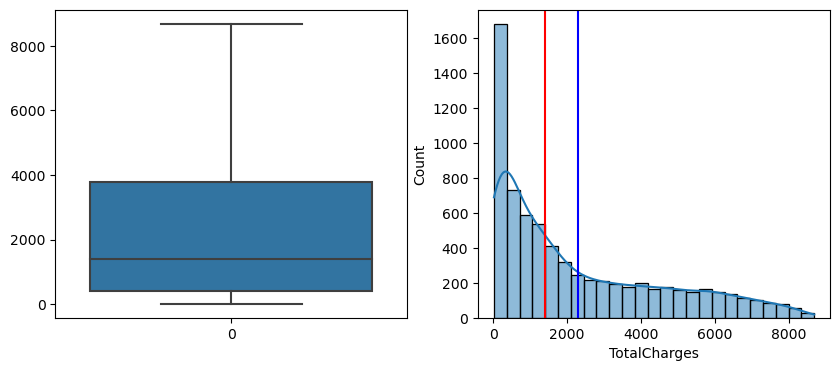

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.boxplot(churn.TotalCharges)

plt.subplot(122)
sns.histplot(churn.TotalCharges, kde = True)
plt.axvline(churn.TotalCharges.mean(), color = 'blue')
plt.axvline(churn.TotalCharges.median(), color = 'red');

In [11]:
churn.TotalCharges.mean()
churn.TotalCharges.median()

2283.3004408418656

1397.475

In [12]:
churn.TotalCharges.fillna(churn.TotalCharges.mean(), inplace=True)

In [13]:
# To Check Wheather the Corrupted Values present or not.
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
print('Mean:')
churn.mean()
print('='*30)
print('Median:')
churn.median()
print('='*30)
print('skewness:')
churn.skew()
print('='*30)
print('kurtosis:')
churn.kurt()

Mean:


SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

Median:


SeniorCitizen        0.00
tenure              29.00
MonthlyCharges      70.35
TotalCharges      1400.55
dtype: float64

skewness:


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

kurtosis:


SeniorCitizen     1.362596
tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.227468
dtype: float64

## Identifying the Outliers

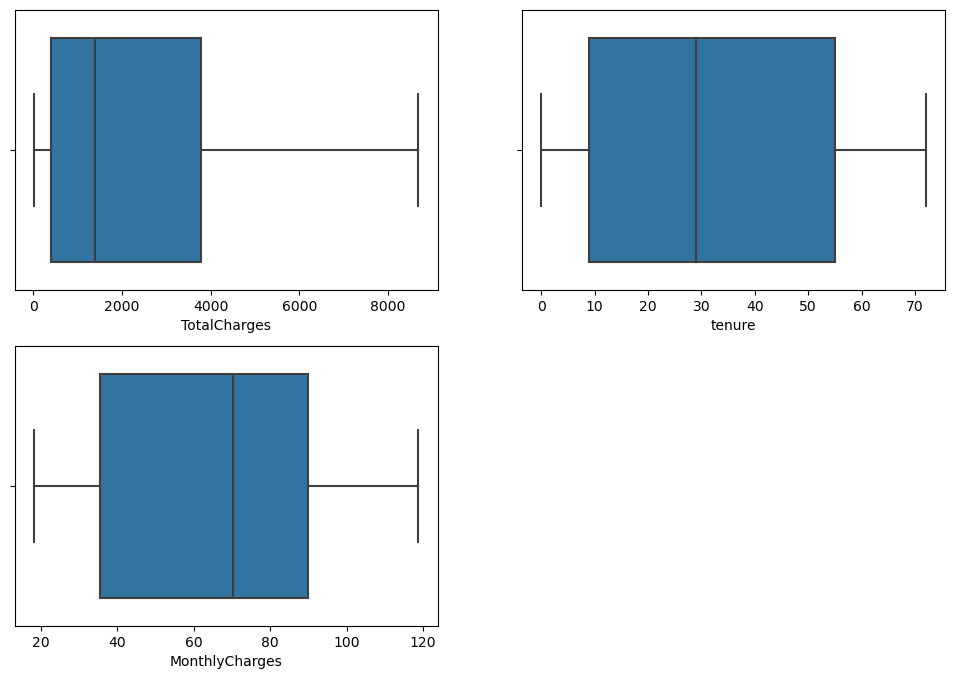

In [15]:
plt.figure(figsize=(12,8))

plt.subplot(221)
sns.boxplot(x = churn.TotalCharges)

plt.subplot(222)
sns.boxplot(x = churn.tenure)

plt.subplot(223)
sns.boxplot(x = churn.MonthlyCharges);

- There are no outliers in any numerical columns 

In [16]:
# Descriptive Statisticts
churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [17]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data Visualization

In [18]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


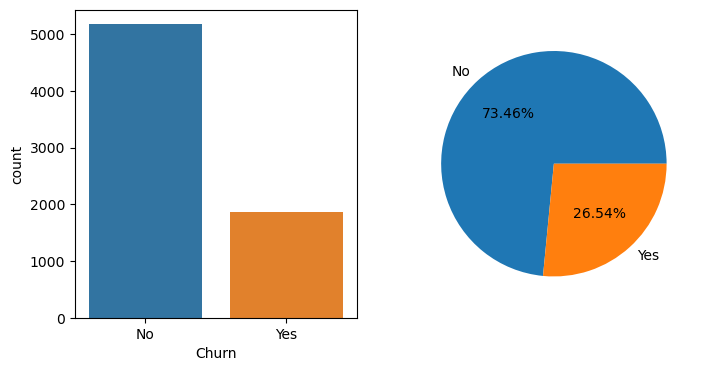

In [19]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.countplot(x=churn.Churn)
plt.subplot(122)
plt.pie(churn.Churn.value_counts().values, labels=churn.Churn.value_counts().index, autopct='%.2f%%');

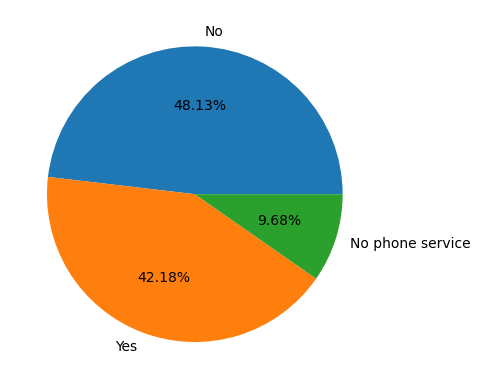

In [20]:
plt.pie(churn.MultipleLines.value_counts().values, labels=churn.MultipleLines.value_counts().index, autopct='%.2f%%');

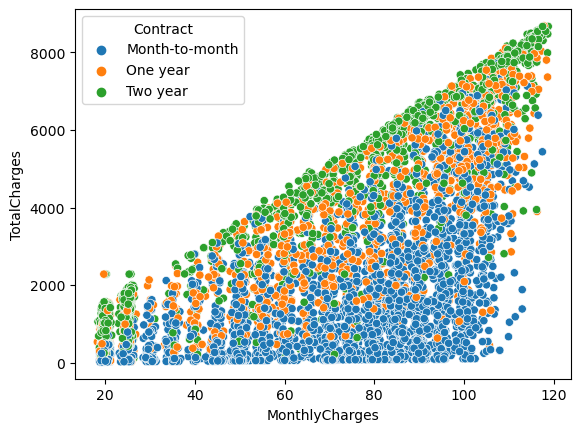

In [21]:
sns.scatterplot(x=churn.MonthlyCharges,y=churn.TotalCharges, hue=churn.Contract);

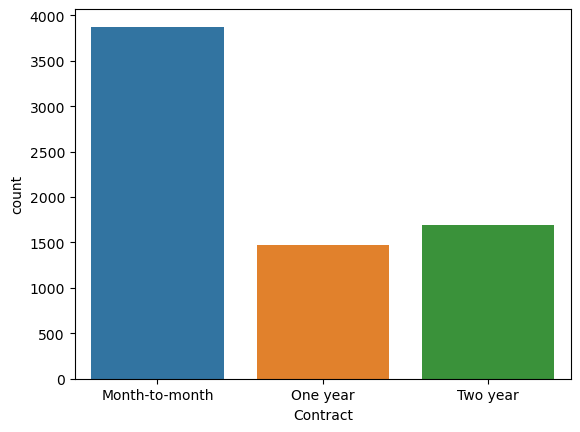

In [22]:
sns.countplot(x=churn.Contract);

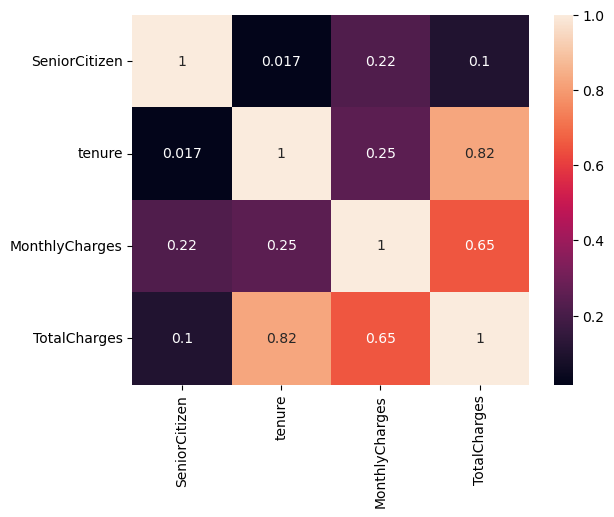

In [23]:
sns.heatmap(churn.corr(), annot=True);

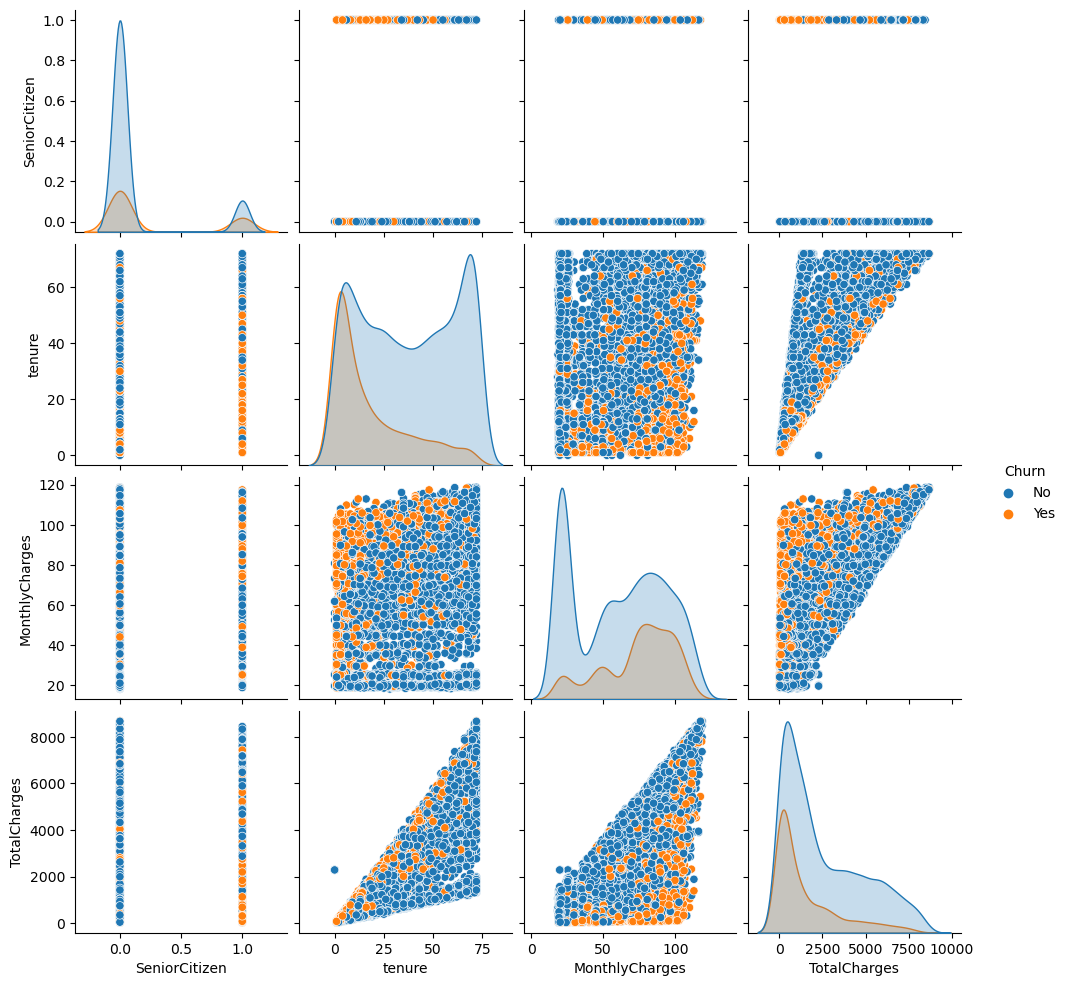

In [24]:
sns.pairplot(churn, hue='Churn');

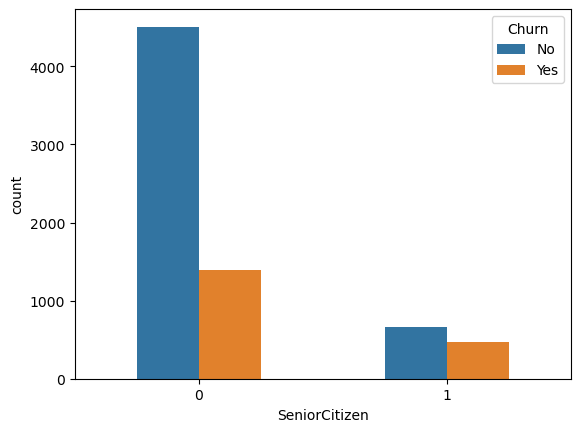

In [25]:
sns.countplot(x=churn.SeniorCitizen, hue=churn.Churn,width=0.5);

In [26]:
churn[['SeniorCitizen','Churn']].groupby('Churn').count()

,SeniorCitizen
Churn,
No,5174
Yes,1869


## Conclusion:

- SeniorCitizen
- Churn	
- No	- 5174
- Yes	- 1869
- By seening the above graph we should suggest the clients that they should target non-senior citizen to ehance the not churn.

# Data Preparation

### Identifying the Input and Output Variables

In [27]:
y = churn['Churn']
X = churn.drop(['Churn','customerID'], axis=1)

### Separating the train and test data

In [31]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [33]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6247,Male,0,No,No,60,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Electronic check,89.55,5231.20
6510,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20
5258,Male,0,No,No,69,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.70,7220.35
1709,Male,1,No,No,30,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),69.10,2093.90
2072,Male,0,No,Yes,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.35,779.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Female,0,Yes,No,59,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Credit card (automatic),81.25,4639.45
1428,Male,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.45,50.45
6537,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85
4367,Male,1,Yes,No,36,Yes,No,DSL,No,No,Yes,Yes,No,No,One year,No,Credit card (automatic),54.10,1992.85


### Separating Categorical and Numerical Columns on Train data

In [34]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6247,0,60,89.55,5231.20
6510,0,46,99.65,4630.20
5258,0,69,104.70,7220.35
1709,1,30,69.10,2093.90
2072,0,39,19.35,779.20


In [35]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6247,Male,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Electronic check
6510,Female,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check
5258,Male,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic)
1709,Male,No,No,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic)
2072,Male,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,Female,Yes,No,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Credit card (automatic)
1428,Male,No,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6537,Male,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic)
4367,Male,Yes,No,Yes,No,DSL,No,No,Yes,Yes,No,No,One year,No,Credit card (automatic)


### Rescaling the Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns= X_train_num.columns,
                                      index= X_train_num.index)

X_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6247,-0.441001,1.125714,0.821782,1.293673
6510,-0.441001,0.556565,1.158042,1.028964
5258,-0.441001,1.491595,1.326172,2.169790
1709,2.267567,-0.093891,0.140938,-0.088145
2072,-0.441001,0.271991,-1.515395,-0.667202


### Rescaling the Categorical Features

In [37]:
# scaling the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = 'first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6247,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6510,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5258,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1709,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2072,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6247,-0.441001,1.125714,0.821782,1.293673,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6510,-0.441001,0.556565,1.158042,1.028964,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5258,-0.441001,1.491595,1.326172,2.169790,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1709,2.267567,-0.093891,0.140938,-0.088145,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2072,-0.441001,0.271991,-1.515395,-0.667202,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Separating the Numerical and Categorical on the test data

In [40]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3309,0,25,19.90,527.50
321,0,72,60.00,4264.00
3289,0,41,88.50,3645.05
4187,0,36,20.25,717.95
1675,0,29,78.90,2384.15


In [41]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3309,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic)
321,Female,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check
3289,Female,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
4187,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
1675,Female,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


### Applying the Transformation techniques on test data

In [42]:
# Rescaling the test Numerical data.
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3309,-0.441001,-0.297158,-1.497083,-0.778063
321,-0.441001,1.613556,-0.162030,0.867672
3289,-0.441001,0.353298,0.786824,0.595056
4187,-0.441001,0.150030,-1.485431,-0.694180
1675,-0.441001,-0.134544,0.467210,0.039695


In [43]:
# Rescaling the test Categorical data
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
321,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3289,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4187,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1675,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [44]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3309,-0.441001,-0.297158,-1.497083,-0.778063,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
321,-0.441001,1.613556,-0.162030,0.867672,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3289,-0.441001,0.353298,0.786824,0.595056,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4187,-0.441001,0.150030,-1.485431,-0.694180,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1675,-0.441001,-0.134544,0.467210,0.039695,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Experiment Tracking with mlflow

In [30]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

mlflow.autolog()
# Separating the input and output variables.
y = churn['Churn']
X = churn.drop(['Churn','customerID'], axis=1)

# Separating the train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state = 20)

#Separating the numerical and categorical data from the train data
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_cat = X_train.select_dtypes(include=['object'])

#Separating the numerical and categorical data from the test data
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_cat = X_test.select_dtypes(include=['object'])

# Rescaling the train Numerical data
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns= X_train_num.columns,
                                      index= X_train_num.index)
# Rescaling the train Categorical data
encoder = OneHotEncoder(drop = 'first', sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
# Concatenation of the rescaled features of train data
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

# Rescaling the test Numerical data.
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)
# Rescaling the test Categorical data
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)
# Concatenation of the rescaled features of test data
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

# Training and Testing the data
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)
y_test_predicted = classifier.predict(X_test_transformed)
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

2023/05/07 00:30:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/05/07 00:30:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/07 00:30:44 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '08576c046e4642d78a1eacce5a27fb2c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


LogisticRegression()

Mean accuracy score:  0.8222600795002839


## Enabling automatic MLflow logging for scikit-learn runs

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'max_depth':[i for i in range(1, 51)]}]
    clf = GridSearchCV(
        estimator=DecisionTreeClassifier(), 
        param_grid=tuned_parameters, 
        scoring='accuracy',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    clf.fit(X_train_transformed, y_train)
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='accuracy', verbose=1)

### http://127.0.0.1:5000/#/experiments/0?searchFilter=&orderByKey=attributes.start_time&orderByAsc=false&startTime=ALL&lifecycleFilter=Active&modelVersionFilter=All%20Runs&selectedColumns=attributes.%60Source%60,attributes.%60Models%60,metrics.%60accuracy_score_X_test_transformed%60,metrics.%60training_accuracy_score%60,metrics.%60training_f1_score%60,metrics.%60training_log_loss%60,metrics.%60training_precision_score%60,metrics.%60training_recall_score%60,metrics.%60training_roc_auc%60,metrics.%60training_score%60,params.%60C%60,params.%60class_weight%60,params.%60dual%60,params.%60fit_intercept%60,params.%60intercept_scaling%60,params.%60l1_ratio%60,params.%60max_iter%60,params.%60multi_class%60,params.%60n_jobs%60,params.%60penalty%60,params.%60random_state%60,params.%60solver%60,params.%60tol%60,params.%60verbose%60,params.%60warm_start%60,attributes.%60User%60&isComparingRuns=false&compareRunCharts=&runsExpanded[78a767c8eaa84d0a9c6e338fae0e642b]=false

## Training the data
### Logistics Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [46]:
y_test_predicted = classifier.predict(X_test_transformed)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df.head()

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,Yes


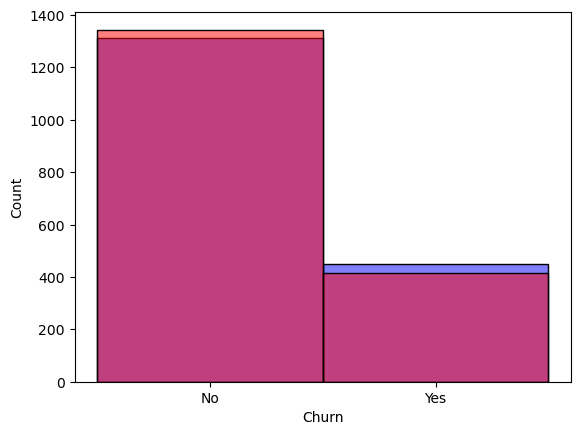

In [47]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [48]:
from sklearn import metrics
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

LogisticRegression_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8222600795002839


### KNeighborsClassifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [227]:
y_test_predicted = classifier.predict(X_test_transformed)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df1.head()

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,Yes


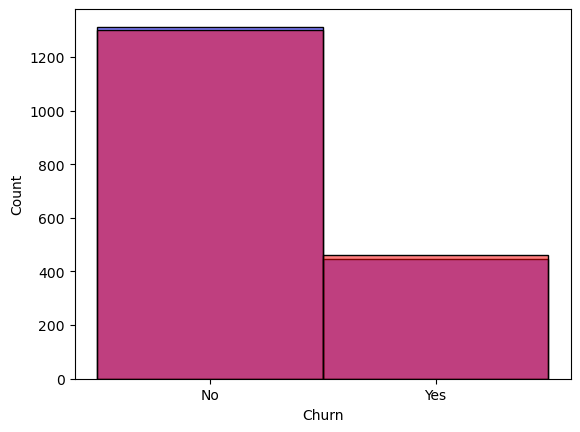

In [228]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [229]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

KNeighborsClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.7808063600227144


### DecisionTreeClassifier

In [230]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [231]:
y_test_predicted = classifier.predict(X_test_transformed)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df2.head()

,Actual,Predicted
3309,No,No
321,No,No
3289,No,Yes
4187,No,No
1675,Yes,No


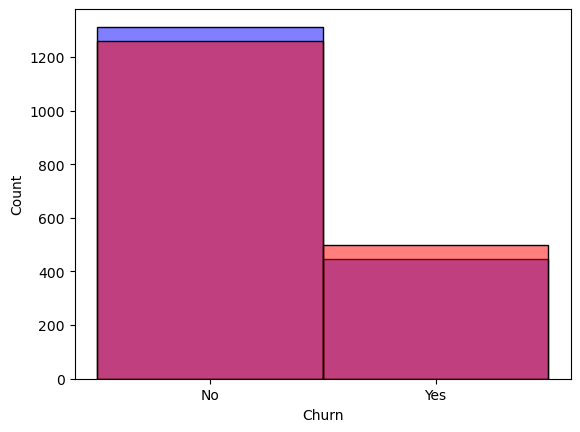

In [232]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [233]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

DecisionTreeClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.7262918796138558


### SupportVectorClassifier

In [234]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

SVC()

In [235]:
y_test_predicted = classifier.predict(X_test_transformed)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df3.head()

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,No


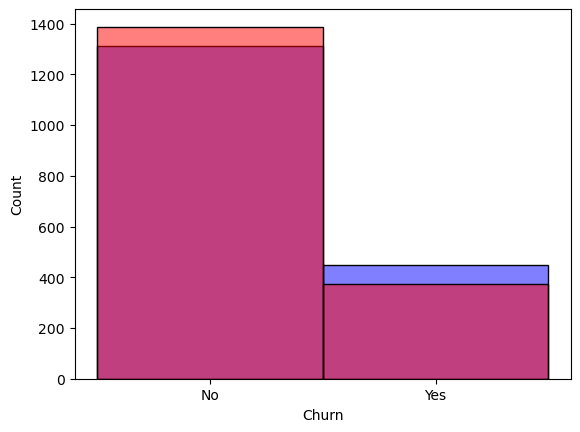

In [236]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [237]:
print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))
SVC_score = metrics.accuracy_score(y_test, y_test_predicted)

Mean accuracy score:  0.8222600795002839


### Random Forest Classifier

In [238]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [239]:
y_test_predicted = classifier.predict(X_test_transformed)

df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df4.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

RandomForestClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,Yes


Mean accuracy score:  0.797274275979557


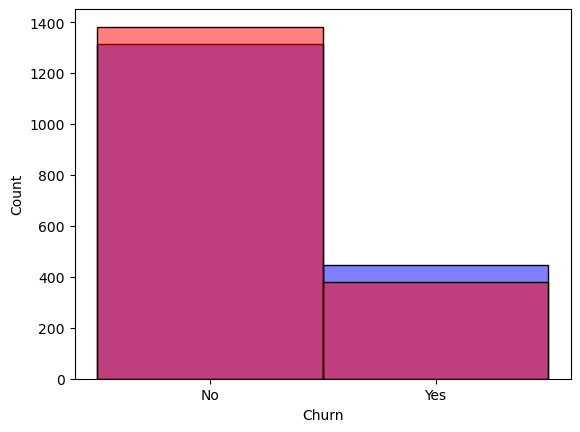

In [240]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### ADA Boost Classifier

In [241]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [242]:
y_test_predicted = classifier.predict(X_test_transformed)

df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df5.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

AdaBoostClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,No


Mean accuracy score:  0.8222600795002839


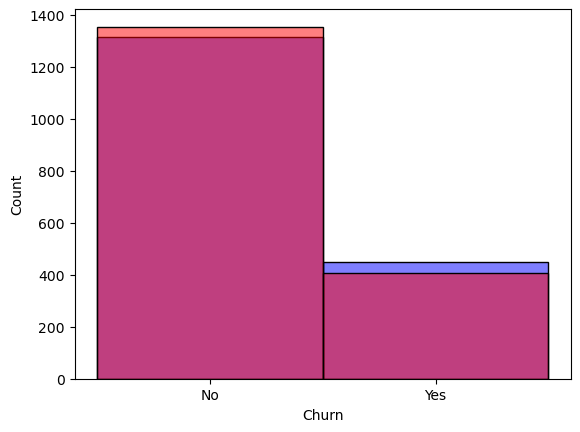

In [243]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### GBDT(GradientBoostingClassifier) Classifier

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [245]:
y_test_predicted = classifier.predict(X_test_transformed)

df6 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df6.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

GradientBoostingClassifier_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,No


Mean accuracy score:  0.8137421919363997


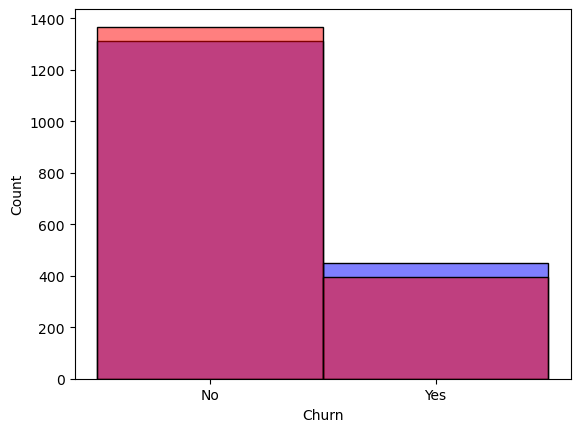

In [246]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### Bagging Classifier

In [247]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(X_train_transformed, y_train)

BaggingClassifier()

In [248]:
y_test_predicted = classifier.predict(X_test_transformed)

df7 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})

df7.head()

print('Mean accuracy score: ', metrics.accuracy_score(y_test, y_test_predicted))

Bagging_score = metrics.accuracy_score(y_test, y_test_predicted)

,Actual,Predicted
3309,No,No
321,No,No
3289,No,No
4187,No,No
1675,Yes,No


Mean accuracy score:  0.7853492333901193


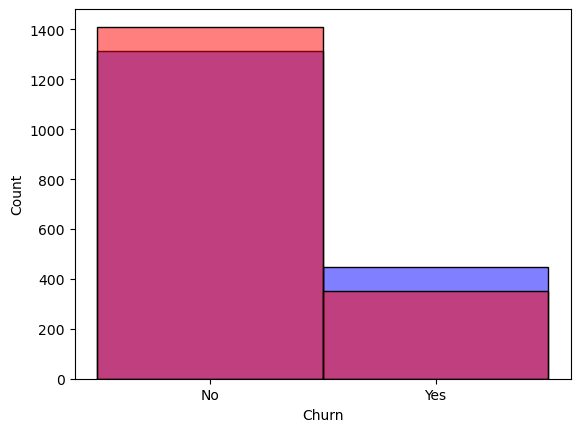

In [249]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [250]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", 
                                      "RandomForestClassifier", "Support Vector Classifier","GradientBoostingClassifier",
                                     "AdaBoostClassifier"],
                    "Accuracy_Score": [LogisticRegression_score, KNeighborsClassifier_score, DecisionTreeClassifier_score, 
                                       RandomForestClassifier_score, SVC_score, GradientBoostingClassifier_score,
                                       AdaBoostClassifier_score],
                     "Percentage": [LogisticRegression_score*100, KNeighborsClassifier_score*100, 
                                     DecisionTreeClassifier_score*100, RandomForestClassifier_score*100, SVC_score*100 , 
                                     GradientBoostingClassifier_score*100,AdaBoostClassifier_score*100]})

In [251]:
Results.Percentage = np.round(Results.Percentage,2).astype(str) + '%'

In [252]:
Results.sort_values(by="Accuracy_Score", ascending=False,ignore_index=True)

,Algorithm,Accuracy_Score,Percentage
0,LogisticRegression,0.822260,82.23%
1,Support Vector Classifier,0.822260,82.23%
2,AdaBoostClassifier,0.822260,82.23%
3,GradientBoostingClassifier,0.813742,81.37%
4,RandomForestClassifier,0.797274,79.73%
5,KNeighborsClassifier,0.780806,78.08%
6,DecisionTreeClassifier,0.726292,72.63%


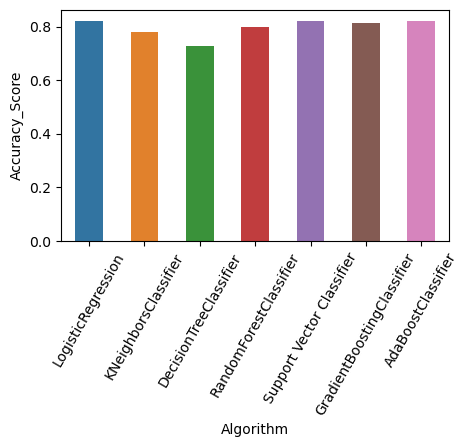

In [253]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=60)
sns.barplot(x= Results.Algorithm, y=Results.Accuracy_Score,width=0.5);

## Conclusion:
### Based on the Exploratory Data Analysis we found an Interesting Insight 
- By observing the graph on SeniorCitizen and churn we should suggest the clients that they should target non-senior citizen to ehance the not churn in the future.

### Resluts of the algorithms:
- By Performing all the algorithm to the churn perdiction ` AdaBoostClassifier`,`LogisticRegression` and `Support Vector Classifier	` are giving more accurate results compared to the all other algorithms.
- From the above results ` AdaBoostClassifier`, `LogisticRegression`and `Support Vector Classifier` these three algoritms are giving same accuracy and the accuracy is `82.23%` .